In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn

files = os.listdir('C:\\Users\\janha\\material\\sem 10\\Network science\\Coding assignment\\dataset_v2")

In [22]:
files.sort()
files

['ADANIPORTS.csv',
 'AMBUJACEM.csv',
 'APOLLOTYRE.csv',
 'ASIANPAINT.csv',
 'AXISBANK.csv',
 'BAJAJFINSV.csv',
 'BANDHANBNK.csv',
 'BANKINDIA.csv',
 'BHEL.csv',
 'BRITANNIA.csv',
 'CASTROLIND.csv',
 'CIPLA.csv',
 'COALINDIA.csv',
 'CUMMINSIND.csv',
 'DMART.csv',
 'DRREDDY.csv',
 'EXIDEIND.csv',
 'FEDERALBNK.csv',
 'GODREJCP.csv',
 'HAVELLS.csv',
 'HDFCBANK.csv',
 'HINDUNILVR.csv',
 'INDIGO.csv',
 'IRCTC.csv',
 'IRFC.csv',
 'ITC.csv',
 'JINDALSTEL.csv',
 'KOTAKBANK.csv',
 'MANAPPURAM.csv',
 'MARUTI.csv',
 'MUTHOOTFIN.csv',
 'NESTLEIND.csv',
 'OIL.csv',
 'ONGC.csv',
 'PFC.csv',
 'POLYCAB.csv',
 'POWERGRID.csv',
 'RELIANCE.csv',
 'SBICARD.csv',
 'SBILIFE.csv',
 'SHREECEM.csv',
 'TATAELXSI.csv',
 'TATAPOWER.csv',
 'TATASTEEL.csv',
 'TCS.csv',
 'TITAN.csv',
 'TORNTPOWER.csv',
 'TVSMOTOR.csv',
 'ULTRACEMCO.csv',
 'UNIONBANK.csv',
 'VEDL.csv',
 'WIPRO.csv',
 'YESBANK.csv',
 'ZEEL.csv']

In [3]:
def modify(path):
    
    df = pd.read_csv(os.path.join('C:\\Users\\janha\\material\\sem 10\\Network science\\Coding assignment\\dataset_v2', path))
    df = df[::-1].reset_index(drop = True)
    
    
    close = []

    for i in df['close ']:
        try:
            close.append(float(i))
        except:
            close.append(float(i.replace(',','')))
            
    
    df['CLOSE'] = close
    df['RETURN_PRICE'] = np.log(df['CLOSE']) - np.log(df['CLOSE'].shift(1))
    
    df.to_csv(os.path.join('C:\\Users\\janha\\material\\sem 10\\Network science\\Coding assignment\\Modified_Dataset_v2', path), columns= df.columns)
    
    plt.plot(df['RETURN_PRICE'])
    plt.xlabel('Day')
    plt.ylabel('Return Price')
    plt.ylim(-0.3,0.3)
    plt.title(path)
    plt.show()

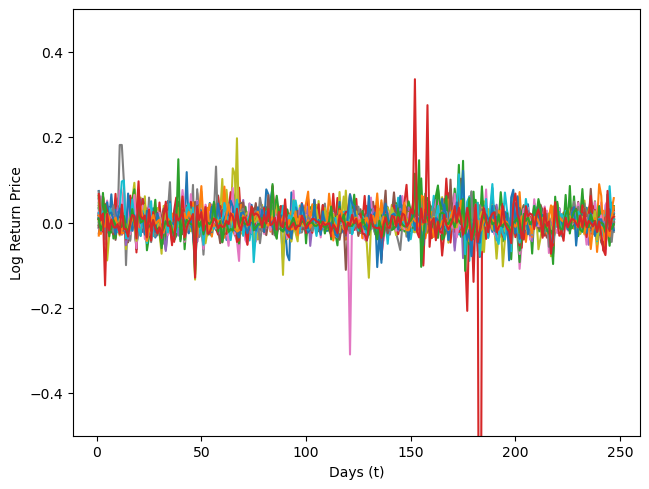

In [4]:
for file in files:
    df = pd.read_csv(os.path.join('C:\\Users\\janha\\material\\sem 10\\Network science\\Coding assignment\\Modified_Dataset_v2', file), index_col= 0)
    plt.plot(df['RETURN_PRICE'], label = file)

plt.ylim(-0.5,0.5)
plt.tight_layout()
plt.xlabel('Days (t)')
plt.ylabel('Log Return Price')
# plt.title('NIFTY200')
plt.savefig('detrend.jpg', dpi=1200, bbox_inches = 'tight')

plt.show() 

## Calculating correlation

In [6]:
files = os.listdir('C:\\Users\\janha\\material\\sem 10\\Network science\\Coding assignment\\Modified_Dataset_v2')
len(files)

54

In [7]:
matrix = pd.DataFrame()
# df = pd.read_csv(os.path.join('C:\\material\\sem 10\\Network science\\Coding assignment\\Modified_Dataset', path), index_col= 0)
    

In [8]:
def build_data_matrix(path, matrix):
    
    df = pd.read_csv(os.path.join('C:\\Users\\janha\\material\\sem 10\\Network science\\Coding assignment\\Modified_Dataset_v2', path), index_col= 0)
    
    matrix[path[:-4]] = df['RETURN_PRICE'] #removes the file extension from the path
    
    return matrix    

In [9]:
for file in files:
    
    matrix = build_data_matrix(file, matrix)
print(matrix)

     ADANIPORTS  AMBUJACEM  APOLLOTYRE  ASIANPAINT  AXISBANK  BAJAJFINSV  \
0           NaN        NaN         NaN         NaN       NaN         NaN   
1      0.014723   0.057552    0.062577    0.006454  0.006814   -0.025577   
2      0.016744  -0.026781   -0.000220   -0.004067  0.027073    0.006285   
3      0.014710   0.014030    0.069623   -0.021358  0.013670    0.017103   
4     -0.002554  -0.005330   -0.009270   -0.010484 -0.033211    0.002229   
..          ...        ...         ...         ...       ...         ...   
243   -0.030079  -0.043805   -0.052517   -0.037236 -0.011150   -0.039206   
244    0.012239  -0.003833    0.000235   -0.002555  0.065372   -0.011410   
245   -0.002817   0.000427    0.003056   -0.009626  0.028376   -0.010949   
246    0.001480   0.025410    0.010273   -0.001959 -0.011894   -0.010544   
247    0.008623   0.012262    0.006483    0.013220  0.010860    0.031782   

     BANDHANBNK  BANKINDIA      BHEL  BRITANNIA  ...       TCS     TITAN  \
0          

In [10]:
correlation = matrix.corr(method = 'pearson')
print(correlation)

            ADANIPORTS  AMBUJACEM  APOLLOTYRE  ASIANPAINT  AXISBANK  \
ADANIPORTS    1.000000   0.317435    0.400872    0.156728  0.289305   
AMBUJACEM     0.317435   1.000000    0.458067    0.265867  0.271659   
APOLLOTYRE    0.400872   0.458067    1.000000    0.053838  0.395967   
ASIANPAINT    0.156728   0.265867    0.053838    1.000000  0.082248   
AXISBANK      0.289305   0.271659    0.395967    0.082248  1.000000   
BAJAJFINSV    0.267982   0.278828    0.368348    0.169880  0.403961   
BANDHANBNK    0.349948   0.369026    0.474541    0.002958  0.436900   
BANKINDIA     0.333555   0.221566    0.362092    0.006093  0.283291   
BHEL          0.423883   0.361195    0.452891    0.053706  0.283431   
BRITANNIA     0.144985   0.212850    0.095098    0.300138  0.053879   
CASTROLIND    0.179999   0.233638    0.259712    0.067812  0.204346   
CIPLA         0.042368   0.036125    0.005356    0.040596  0.008967   
COALINDIA     0.322058   0.232278    0.433225   -0.005245  0.350719   
CUMMIN

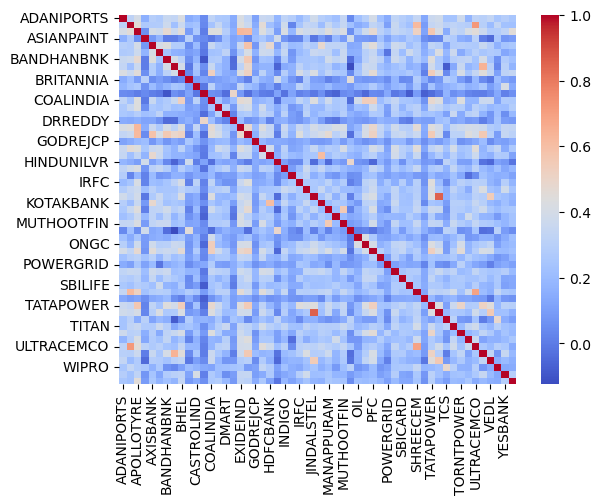

In [11]:
ax = sns.heatmap( correlation, cmap = 'coolwarm' )

### Threshold = 0.25

In [62]:
import numpy as np
import networkx as nx

def correlation_to_adjacency(correlation, threshold):
    adjacency_matrix = np.where(correlation >= threshold, 1, 0)
    return adjacency_matrix

# Example threshold
threshold = 0.25

# Convert correlation matrix to adjacency matrix
adjacency_matrix = correlation_to_adjacency(correlation, threshold)

# print("Correlation Matrix:")
# print(correlation_matrix)
print("\nAdjacency Matrix (Threshold = 0.25):")
print(adjacency_matrix)


Adjacency Matrix (Threshold = 0.25):
[[1 1 1 ... 0 1 0]
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [0 1 1 ... 1 0 0]
 [1 0 1 ... 0 1 1]
 [0 0 1 ... 0 1 1]]


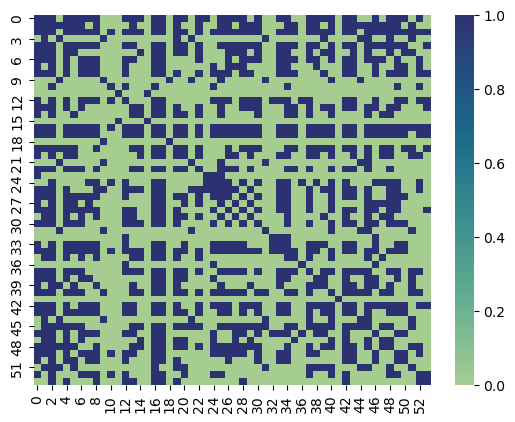

In [63]:
# Define a custom colormap with only black and white colors
cmap_bw = sns.color_palette("binary", as_cmap=True)

# Plot the heatmap with the custom colormap
ax = sns.heatmap(adjacency_matrix, cmap="crest")

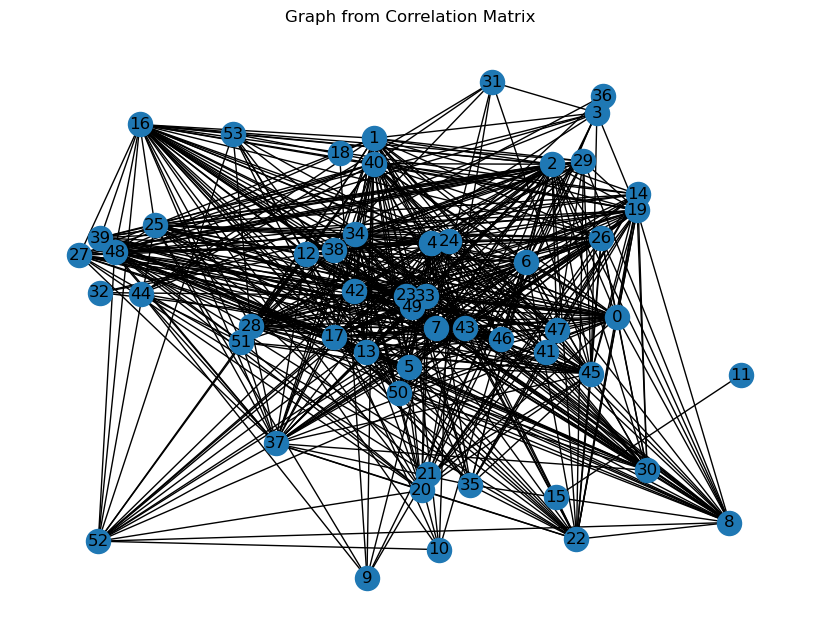

In [64]:
# Create a graph
G = nx.Graph()
edge_list = []

# Add nodes
num_nodes = correlation.shape[0]  # Assuming the correlation matrix is square
G.add_nodes_from(range(num_nodes))

# Add edges based on the adjacency matrix
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):  # Only consider upper triangle of adjacency matrix
        if correlation.iloc[i, j] >= 0.25:
            edge_list.append((i, j))
G.add_edges_from(edge_list)


# edges = [((u,v),data[u].corr(data[v])) for u,v in itertools.combinations(vertices, 2)]
# edges = [(u,v,{'weight': c}) for (u,v),c in edges if c >= 0.3]

# G = networkx.Graph()
# G.add_edges_from(edges)
pos = nx.spring_layout(G, scale=1000)
# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw_random(G, with_labels=True)
plt.title('Graph from Correlation Matrix')
plt.show()

In [65]:
# # Transform it in a links data frame (3 columns only):
# links = correlation.stack().reset_index()
# links.columns = ['var1', 'var2', 'value']
 
# # Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
# links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
 
# # Build your graph
# G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# # Plot the network:
# nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

In [66]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print centrality scores
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nCloseness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")


Degree Centrality:
Node 0: 0.6415094339622641
Node 1: 0.5849056603773585
Node 2: 0.7735849056603773
Node 3: 0.18867924528301885
Node 4: 0.660377358490566
Node 5: 0.4528301886792453
Node 6: 0.5283018867924528
Node 7: 0.3962264150943396
Node 8: 0.5283018867924528
Node 9: 0.1320754716981132
Node 10: 0.1320754716981132
Node 11: 0.018867924528301886
Node 12: 0.5094339622641509
Node 13: 0.49056603773584906
Node 14: 0.33962264150943394
Node 15: 0.018867924528301886
Node 16: 0.7735849056603773
Node 17: 0.7358490566037735
Node 18: 0.018867924528301886
Node 19: 0.5849056603773585
Node 20: 0.43396226415094336
Node 21: 0.11320754716981132
Node 22: 0.4716981132075472
Node 23: 0.05660377358490566
Node 24: 0.43396226415094336
Node 25: 0.5471698113207547
Node 26: 0.5283018867924528
Node 27: 0.3773584905660377
Node 28: 0.5094339622641509
Node 29: 0.3773584905660377
Node 30: 0.4716981132075472
Node 31: 0.1320754716981132
Node 32: 0.07547169811320754
Node 33: 0.49056603773584906
Node 34: 0.69811320754716

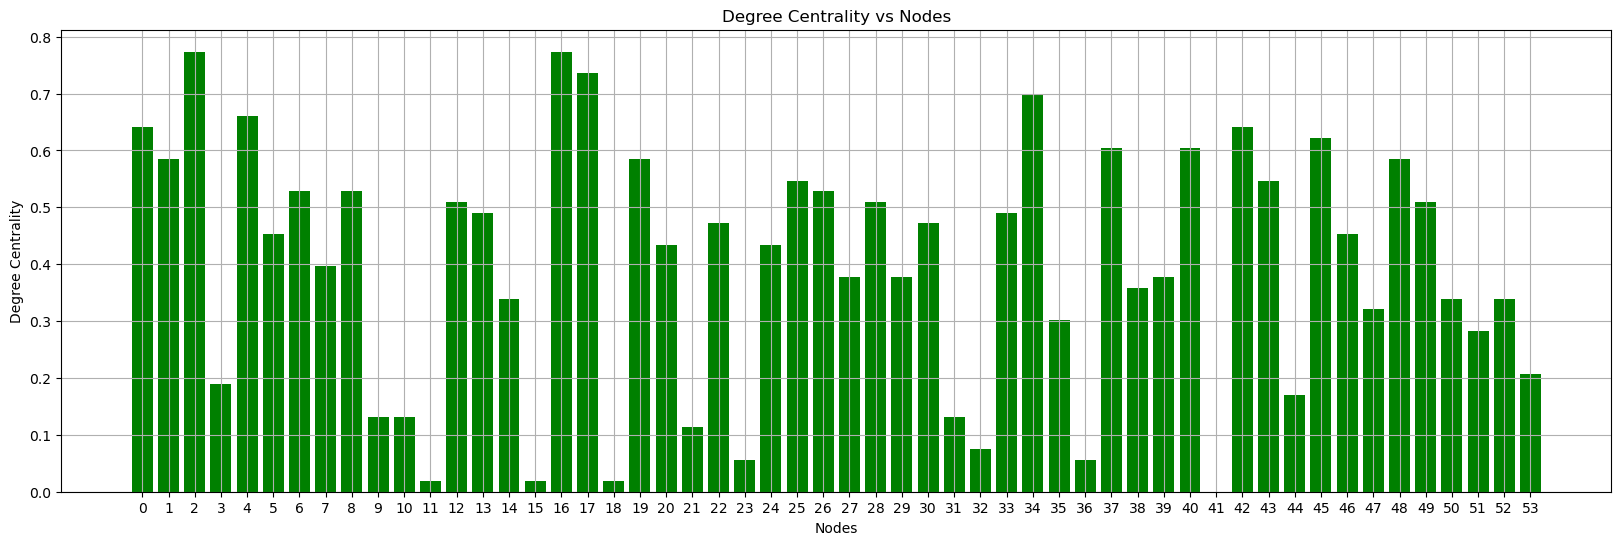

In [67]:
import matplotlib.pyplot as plt

# Extract centrality scores
nodes = list(G.nodes())
degree_centralities = [degree_centrality[node] for node in nodes]
closeness_centralities = [closeness_centrality[node] for node in nodes]
betweenness_centralities = [betweenness_centrality[node] for node in nodes]
eigenvector_centralities = [eigenvector_centrality[node] for node in nodes]

# Assuming degree_centrality is a dictionary with node as key and centrality score as value
nodes = list(degree_centrality.keys())
centrality_scores = list(degree_centrality.values())

# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(degree_centrality.keys(), degree_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Degree Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('degree_0.25.png')
plt.show()

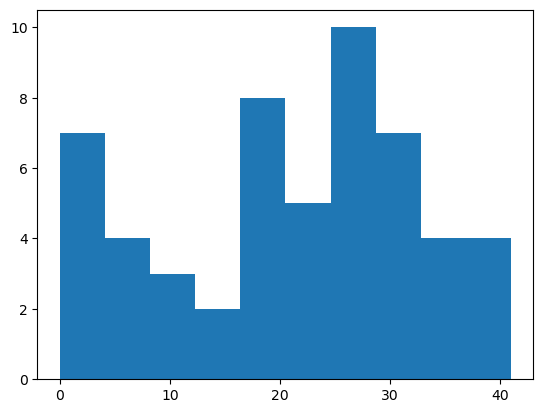

In [68]:
plt.hist([v for k,v in nx.degree(G)]);

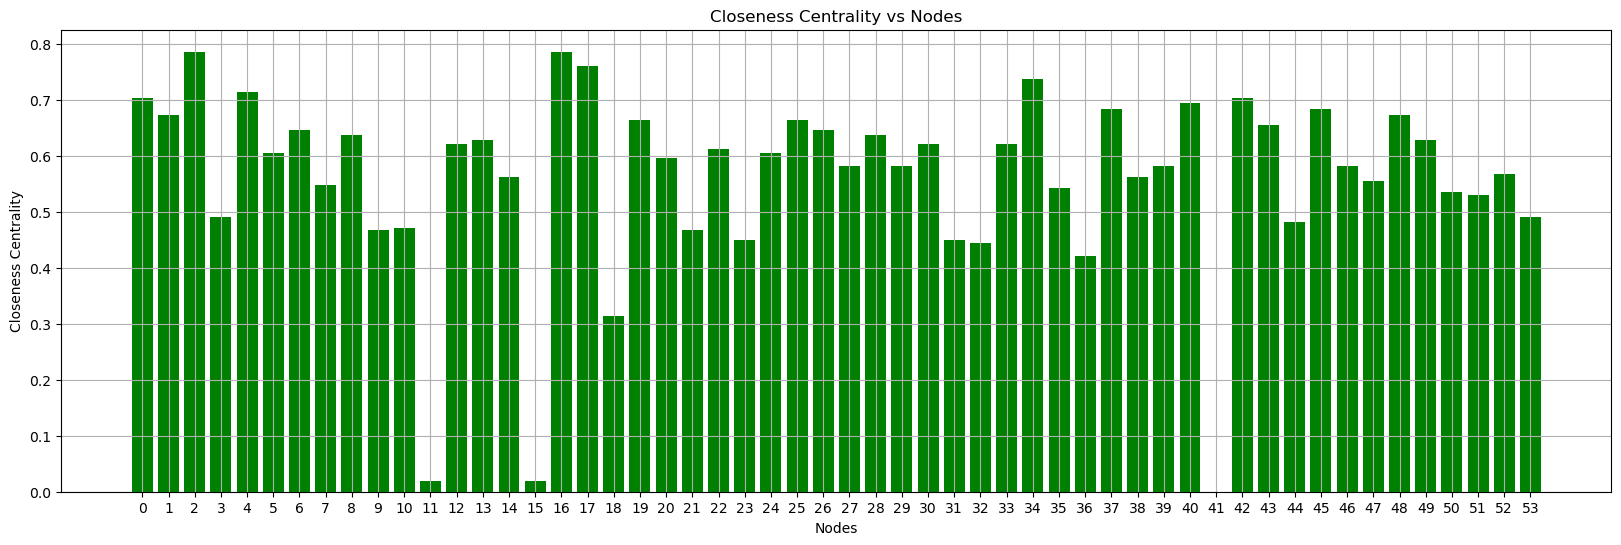

In [69]:
# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(closeness_centrality.keys(), closeness_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Closeness Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('closeness_0.25.png')
plt.show()

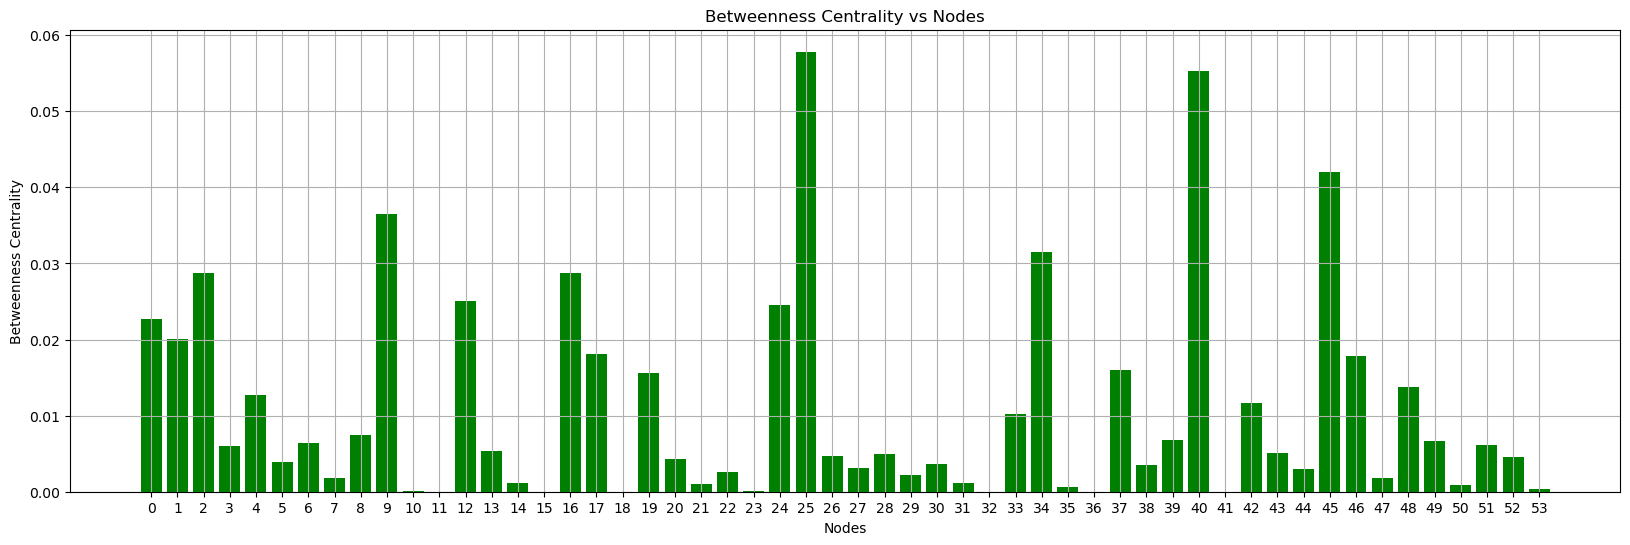

In [70]:
# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Betweenness Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('betweeness_0.25.png')
plt.show()

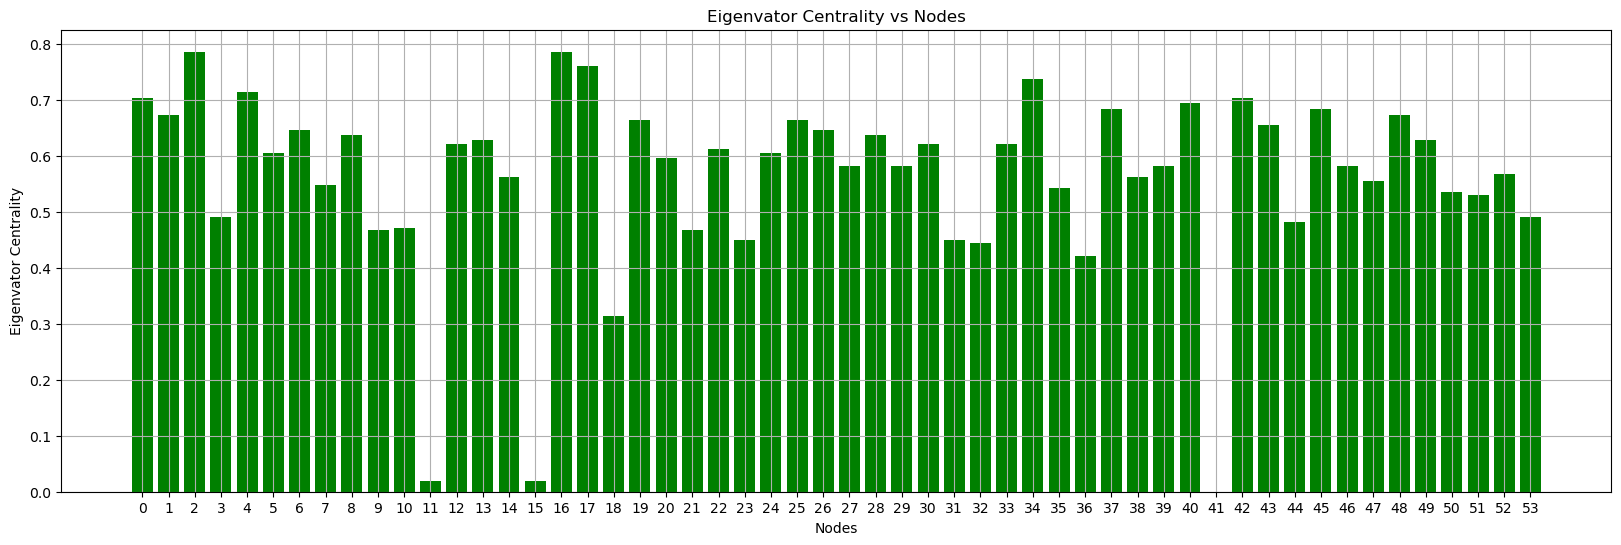

In [71]:
# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(eigenvector_centrality.keys(), closeness_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Eigenvator Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Eigenvator Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('eigenvector_0.25.png')
plt.show()

In [88]:
degree = G.degree()
degree_list = []
Edge_density = nx.density(G) # total number of edges/ Total possible edges

for (n, d) in degree:
    degree_list.append(d)
    degree_dic = {node: G.degree[node] for node in G.nodes}

av_degree = sum(degree_list)/len(degree_list)
print("Average degree", av_degree) #average degree is total degree/total number of nodes
print("Edge density", Edge_density)

Average degree 0.9629629629629629
Edge density 0.01816911250873515


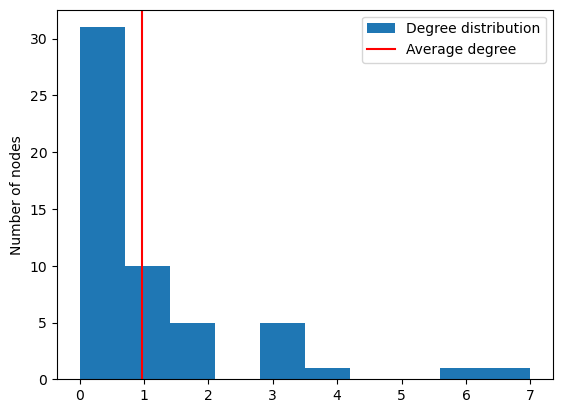

In [89]:
plt.hist(degree_list, label="Degree distribution")
plt.axvline(av_degree, color='r', label ='Average degree')
plt.legend()
plt.ylabel("Number of nodes")
plt.savefig('ns_avdegreedist_0.25.png')
plt.show()# around 30 nodes has degree around 0-1 i.e., has 0-2 links

Local Clustering Coefficient 0.12883597883597883


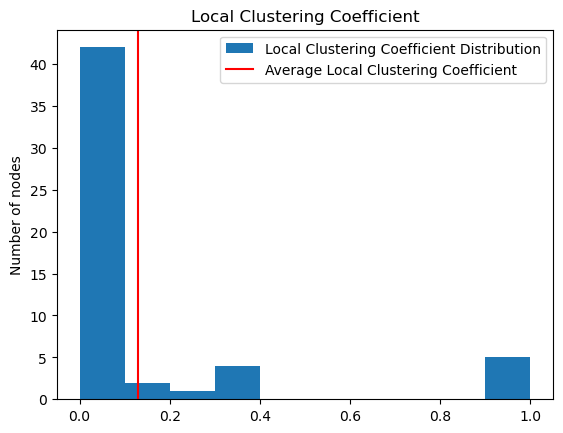

In [90]:
local_clustering_coefficient = nx.algorithms.cluster.clustering(G)
av_lcc = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)
print("Local Clustering Coefficient", av_lcc)

plt.hist(local_clustering_coefficient.values(), label="Local Clustering Coefficient Distribution")
plt.axvline(av_lcc, color='r', label="Average Local Clustering Coefficient")
plt.legend()
plt.ylabel("Number of nodes")
plt.title("Local Clustering Coefficient")
plt.savefig('ns_av_lcc_0.25.png')
plt.show()

### Threshold = 0.3

In [28]:
import numpy as np
import networkx as nx

def correlation_to_adjacency(correlation, threshold):
    adjacency_matrix = np.where(correlation >= threshold, 1, 0)
    return adjacency_matrix

# Example threshold
threshold = 0.3

# Convert correlation matrix to adjacency matrix
adjacency_matrix = correlation_to_adjacency(correlation, threshold)

# print("Correlation Matrix:")
# print(correlation_matrix)
print("\nAdjacency Matrix (Threshold = 0.3):")
print(adjacency_matrix)


Adjacency Matrix (Threshold = 0.3):
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 0 1 1]
 ...
 [0 1 0 ... 1 0 0]
 [0 0 1 ... 0 1 0]
 [0 0 1 ... 0 0 1]]


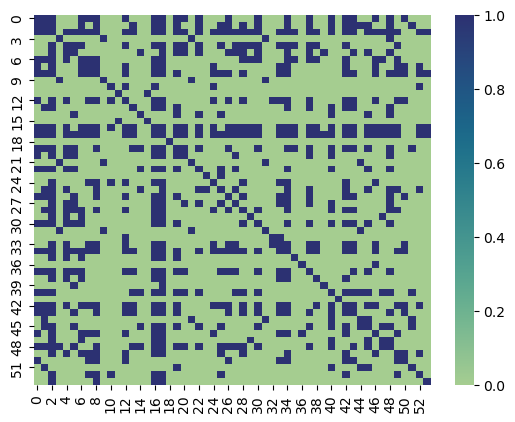

In [29]:
# Define a custom colormap with only black and white colors
cmap_bw = sns.color_palette("binary", as_cmap=True)

# Plot the heatmap with the custom colormap
ax = sns.heatmap(adjacency_matrix, cmap="crest")

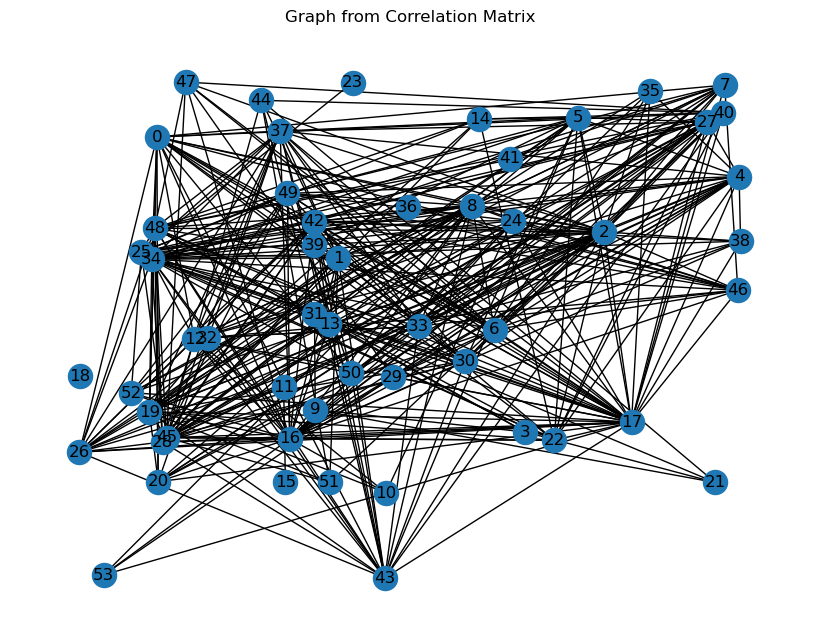

In [56]:
# Create a graph
G = nx.Graph()
edge_list = []

# Add nodes
num_nodes = correlation.shape[0]  # Assuming the correlation matrix is square
G.add_nodes_from(range(num_nodes))

# Add edges based on the adjacency matrix
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):  # Only consider upper triangle of adjacency matrix
        if correlation.iloc[i, j] >= 0.3:
            edge_list.append((i, j))
G.add_edges_from(edge_list)


# edges = [((u,v),data[u].corr(data[v])) for u,v in itertools.combinations(vertices, 2)]
# edges = [(u,v,{'weight': c}) for (u,v),c in edges if c >= 0.3]

# G = networkx.Graph()
# G.add_edges_from(edges)
pos = nx.spring_layout(G, scale=1000)
# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw_random(G, with_labels=True)
plt.title('Graph from Correlation Matrix')
plt.show()

In [57]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print centrality scores
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nCloseness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")
    
print("\nEigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")


Degree Centrality:
Node 0: 0.3962264150943396
Node 1: 0.4150943396226415
Node 2: 0.6792452830188679
Node 3: 0.07547169811320754
Node 4: 0.3962264150943396
Node 5: 0.32075471698113206
Node 6: 0.3584905660377358
Node 7: 0.2830188679245283
Node 8: 0.43396226415094336
Node 9: 0.05660377358490566
Node 10: 0.07547169811320754
Node 11: 0.018867924528301886
Node 12: 0.3773584905660377
Node 13: 0.20754716981132074
Node 14: 0.1320754716981132
Node 15: 0.018867924528301886
Node 16: 0.660377358490566
Node 17: 0.6981132075471698
Node 18: 0.0
Node 19: 0.43396226415094336
Node 20: 0.20754716981132074
Node 21: 0.07547169811320754
Node 22: 0.2830188679245283
Node 23: 0.018867924528301886
Node 24: 0.22641509433962265
Node 25: 0.3018867924528302
Node 26: 0.32075471698113206
Node 27: 0.24528301886792453
Node 28: 0.33962264150943394
Node 29: 0.11320754716981132
Node 30: 0.32075471698113206
Node 31: 0.07547169811320754
Node 32: 0.03773584905660377
Node 33: 0.33962264150943394
Node 34: 0.5283018867924528
Nod

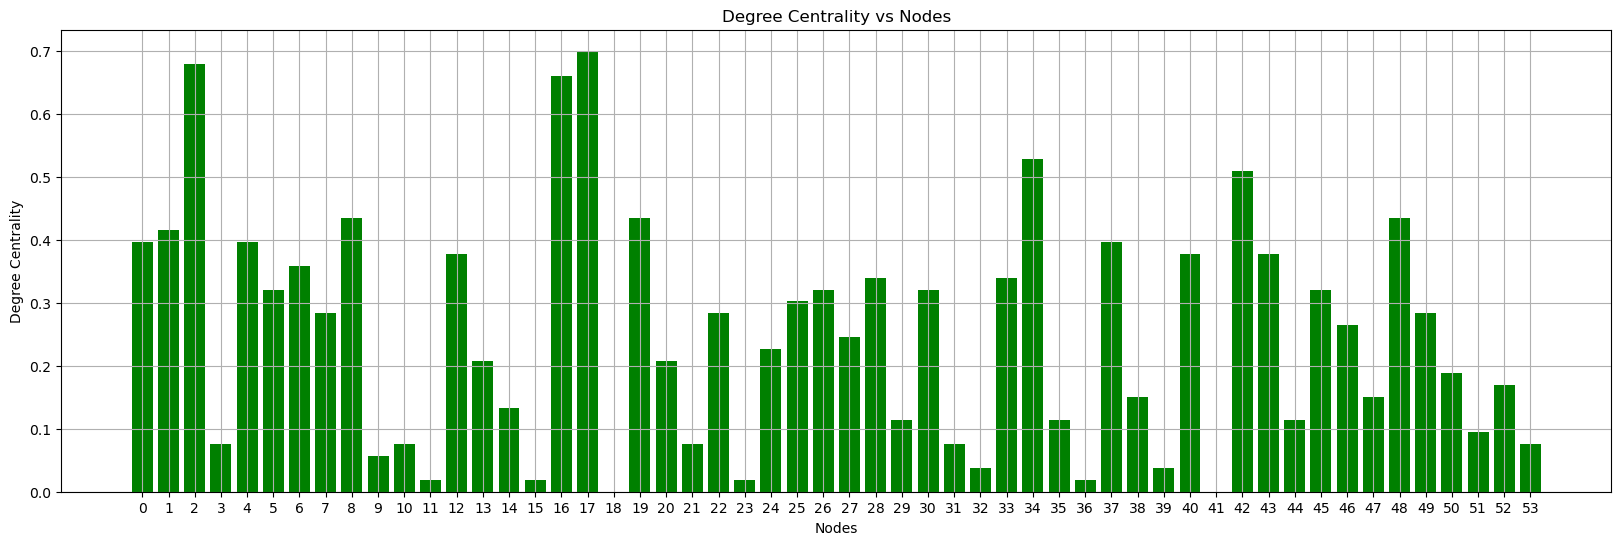

In [58]:
import matplotlib.pyplot as plt

# Extract centrality scores
nodes = list(G.nodes())
degree_centralities = [degree_centrality[node] for node in nodes]
closeness_centralities = [closeness_centrality[node] for node in nodes]
betweenness_centralities = [betweenness_centrality[node] for node in nodes]
eigenvector_centralities = [eigenvector_centrality[node] for node in nodes]


# Assuming degree_centrality is a dictionary with node as key and centrality score as value
nodes = list(degree_centrality.keys())
centrality_scores = list(degree_centrality.values())

# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(degree_centrality.keys(), degree_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Degree Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('degree_0.3.png')
plt.show()

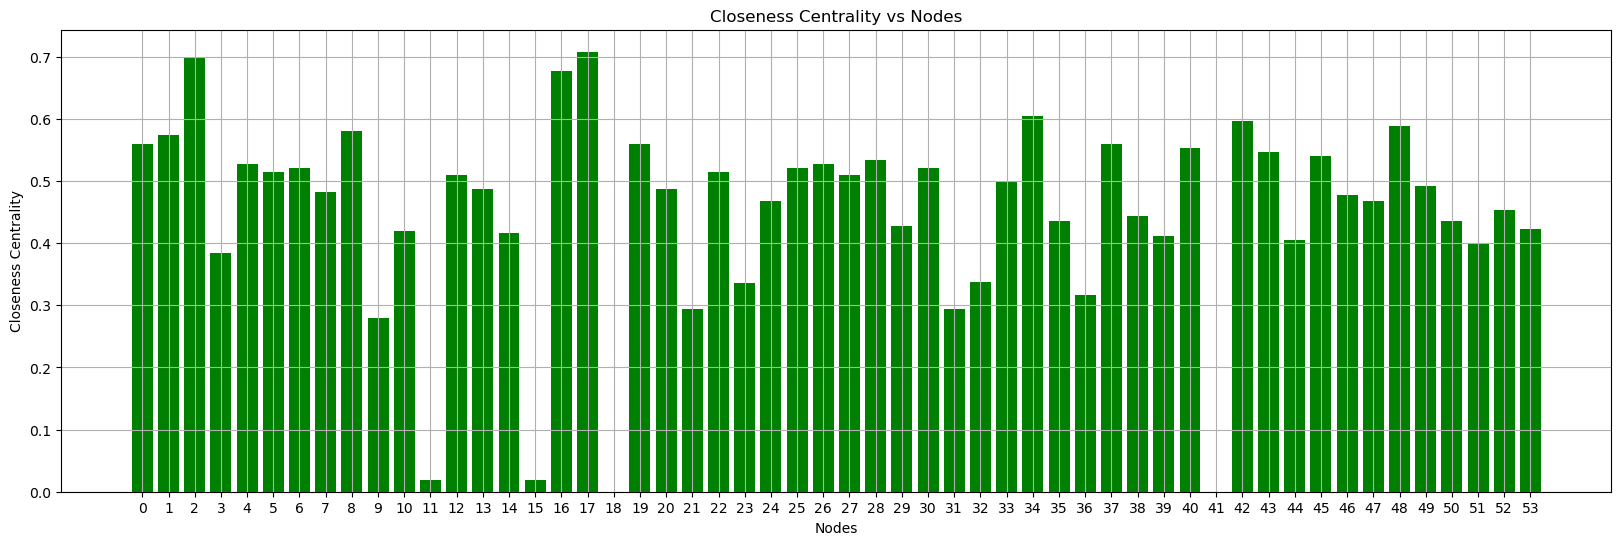

In [59]:
# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(closeness_centrality.keys(), closeness_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Closeness Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('closeness_0.3.png')
plt.show()

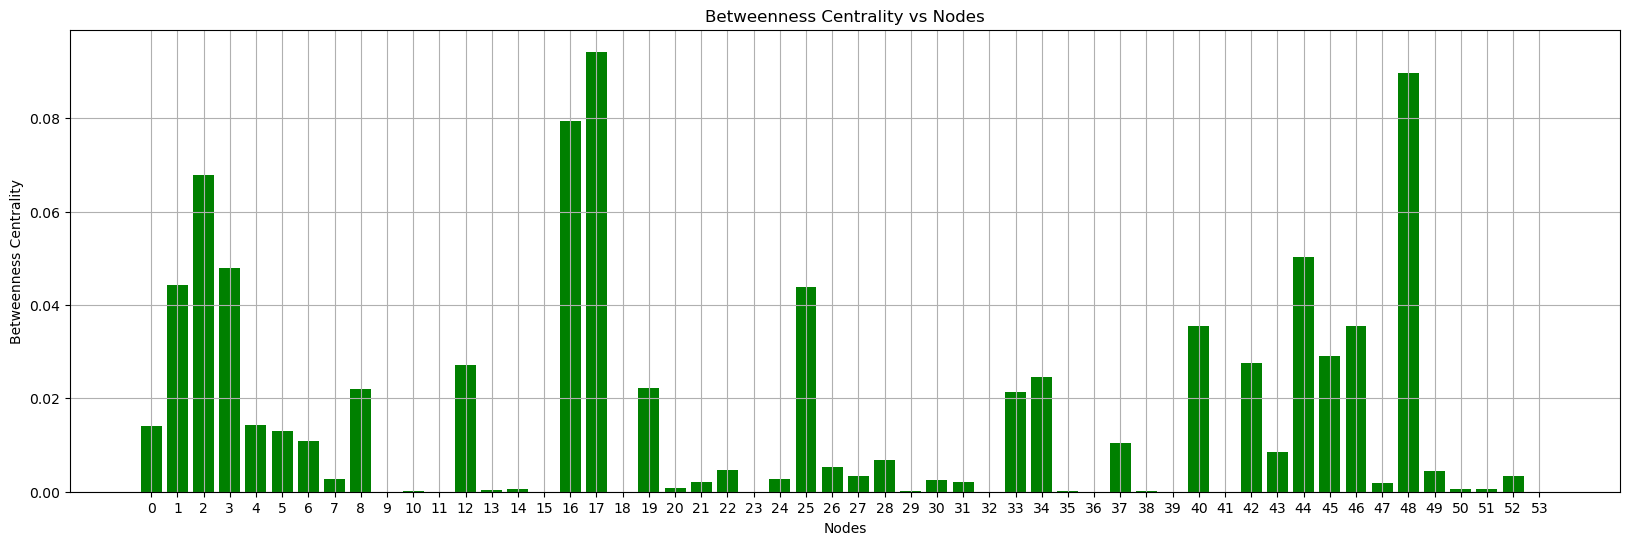

In [60]:
# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Betweenness Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('betweeness_0.3.png')
plt.show()

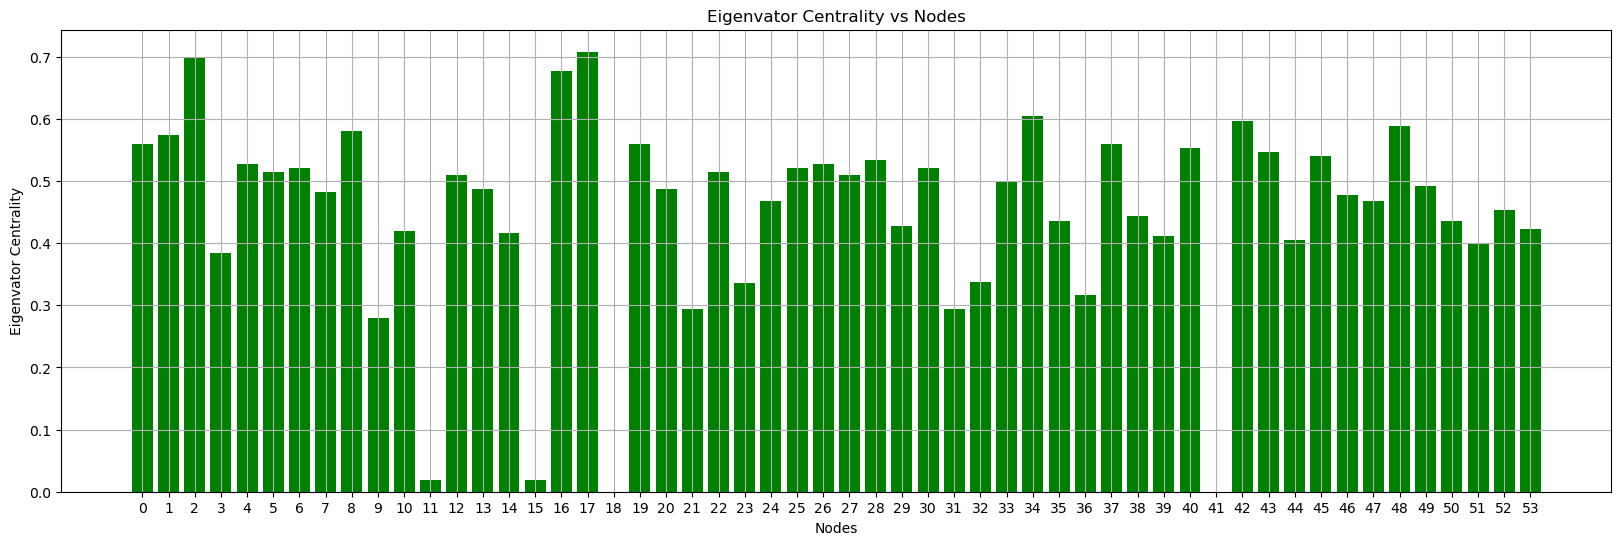

In [61]:
# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(eigenvector_centrality.keys(), closeness_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Eigenvator Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Eigenvator Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('eigenvector_0.3.png')
plt.show()

In [49]:
degree = G.degree()
degree_list = []
Edge_density = nx.density(G) # total number of edges/ Total possible edges

for (n, d) in degree:
    degree_list.append(d)
    degree_dic = {node: G.degree[node] for node in G.nodes}

av_degree = sum(degree_list)/len(degree_list)
print("Average degree", av_degree) #average degree is total degree/total number of nodes
print("Edge density", Edge_density)

Average degree 21.14814814814815
Edge density 0.39902166317260657


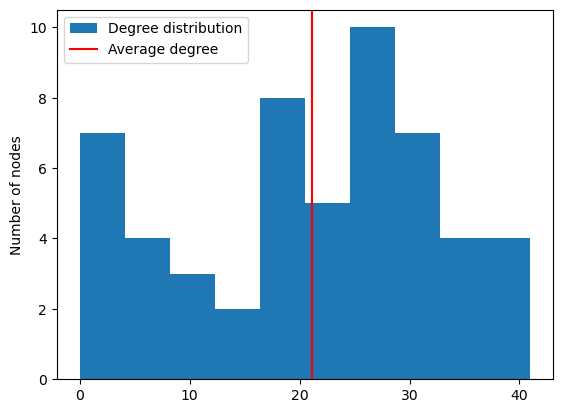

In [50]:
plt.hist(degree_list, label="Degree distribution")
plt.axvline(av_degree, color='r', label ='Average degree')
plt.legend()
plt.ylabel("Number of nodes")
plt.savefig('ns_avdegreedist_0.3.png')
plt.show()# around 30 nodes has degree around 0-1 i.e., has 0-2 links

Local Clustering Coefficient 0.6734550455977044


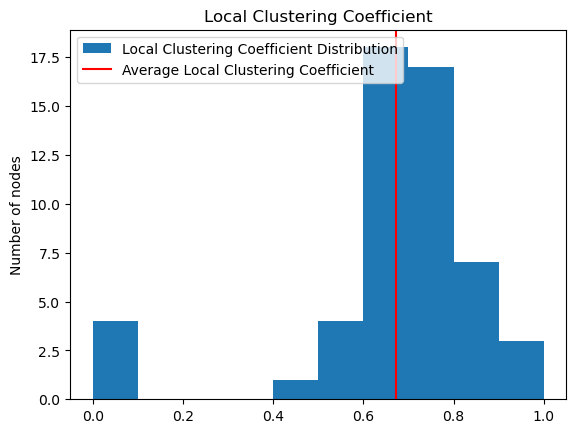

In [51]:
local_clustering_coefficient = nx.algorithms.cluster.clustering(G)
av_lcc = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)
print("Local Clustering Coefficient", av_lcc)

plt.hist(local_clustering_coefficient.values(), label="Local Clustering Coefficient Distribution")
plt.axvline(av_lcc, color='r', label="Average Local Clustering Coefficient")
plt.legend()
plt.ylabel("Number of nodes")
plt.title("Local Clustering Coefficient")
plt.savefig('ns_av_lcc_0.3.png')
plt.show()

### Threshold = 0.5

In [52]:
import numpy as np
import networkx as nx

def correlation_to_adjacency(correlation, threshold):
    adjacency_matrix = np.where(correlation >= threshold, 1, 0)
    return adjacency_matrix

# Example threshold
threshold = 0.5

# Convert correlation matrix to adjacency matrix
adjacency_matrix = correlation_to_adjacency(correlation, threshold)

# print("Correlation Matrix:")
# print(correlation_matrix)
print("\nAdjacency Matrix (Threshold = 0.5):")
print(adjacency_matrix)


Adjacency Matrix (Threshold = 0.5):
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [84]:
# Get the indices where the adjacency matrix has value 1
row_indices, col_indices = np.where(adjacency_matrix == 1)

# Combine the row and column indices to get the nodes
nodes_with_threshold = set(row_indices) | set(col_indices)

print("Nodes with threshold > 0.5:", nodes_with_threshold)


Nodes with threshold > 0.5: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53}


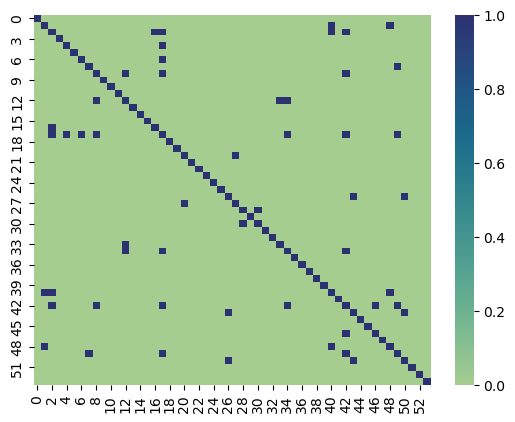

In [53]:
# Define a custom colormap with only black and white colors
cmap_bw = sns.color_palette("binary", as_cmap=True)

# Plot the heatmap with the custom colormap
ax = sns.heatmap(adjacency_matrix, cmap="crest")

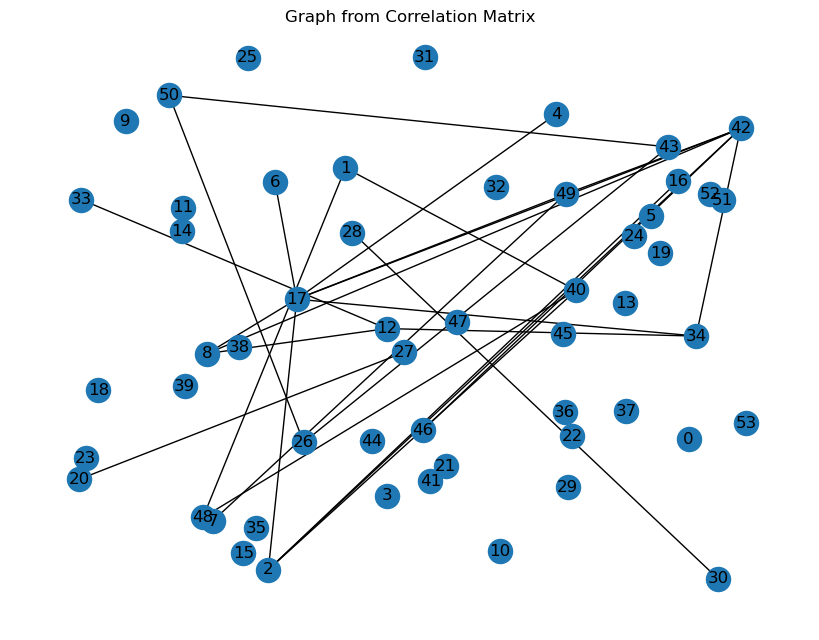

In [74]:
# Create a graph
G = nx.Graph()
edge_list = []

# Add nodes
num_nodes = correlation.shape[0]  # Assuming the correlation matrix is square
G.add_nodes_from(range(num_nodes))

# Add edges based on the adjacency matrix
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):  # Only consider upper triangle of adjacency matrix
        if correlation.iloc[i, j] >= 0.5:
            edge_list.append((i, j))
G.add_edges_from(edge_list)


# edges = [((u,v),data[u].corr(data[v])) for u,v in itertools.combinations(vertices, 2)]
# edges = [(u,v,{'weight': c}) for (u,v),c in edges if c >= 0.3]

# G = networkx.Graph()
# G.add_edges_from(edges)
pos = nx.spring_layout(G, scale=1000)
# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw_random(G, with_labels=True)
plt.title('Graph from Correlation Matrix')
plt.show()

In [75]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print centrality scores
print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nCloseness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")
    
print("\nEigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")

Degree Centrality:
Node 0: 0.0
Node 1: 0.03773584905660377
Node 2: 0.07547169811320754
Node 3: 0.0
Node 4: 0.018867924528301886
Node 5: 0.0
Node 6: 0.018867924528301886
Node 7: 0.018867924528301886
Node 8: 0.05660377358490566
Node 9: 0.0
Node 10: 0.0
Node 11: 0.0
Node 12: 0.05660377358490566
Node 13: 0.0
Node 14: 0.0
Node 15: 0.0
Node 16: 0.018867924528301886
Node 17: 0.1320754716981132
Node 18: 0.0
Node 19: 0.0
Node 20: 0.018867924528301886
Node 21: 0.0
Node 22: 0.0
Node 23: 0.0
Node 24: 0.0
Node 25: 0.0
Node 26: 0.03773584905660377
Node 27: 0.018867924528301886
Node 28: 0.018867924528301886
Node 29: 0.0
Node 30: 0.018867924528301886
Node 31: 0.0
Node 32: 0.0
Node 33: 0.018867924528301886
Node 34: 0.05660377358490566
Node 35: 0.0
Node 36: 0.0
Node 37: 0.0
Node 38: 0.0
Node 39: 0.0
Node 40: 0.05660377358490566
Node 41: 0.0
Node 42: 0.11320754716981132
Node 43: 0.03773584905660377
Node 44: 0.0
Node 45: 0.0
Node 46: 0.018867924528301886
Node 47: 0.0
Node 48: 0.03773584905660377
Node 49: 

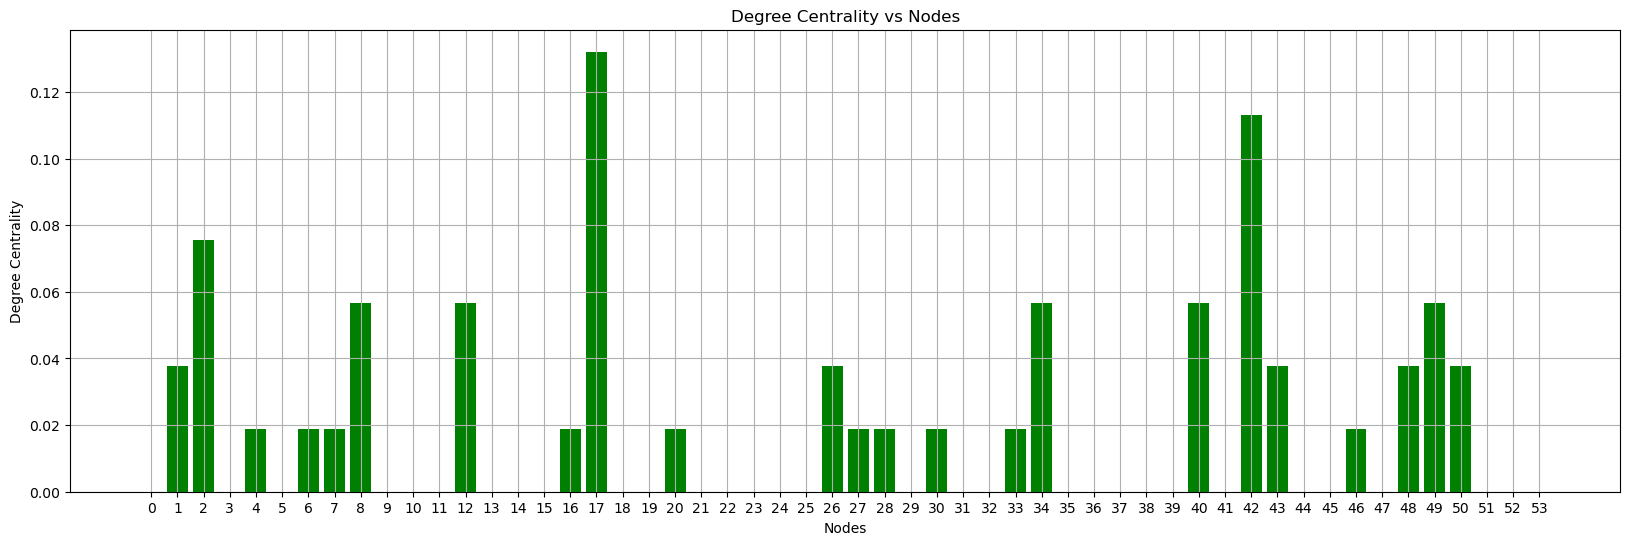

In [76]:
import matplotlib.pyplot as plt

# Extract centrality scores
nodes = list(G.nodes())
degree_centralities = [degree_centrality[node] for node in nodes]
closeness_centralities = [closeness_centrality[node] for node in nodes]
betweenness_centralities = [betweenness_centrality[node] for node in nodes]
eigenvector_centralities = [eigenvector_centrality[node] for node in nodes]


# Assuming degree_centrality is a dictionary with node as key and centrality score as value
nodes = list(degree_centrality.keys())
centrality_scores = list(degree_centrality.values())

# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(degree_centrality.keys(), degree_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Degree Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('degree_0.5.png')
plt.show()

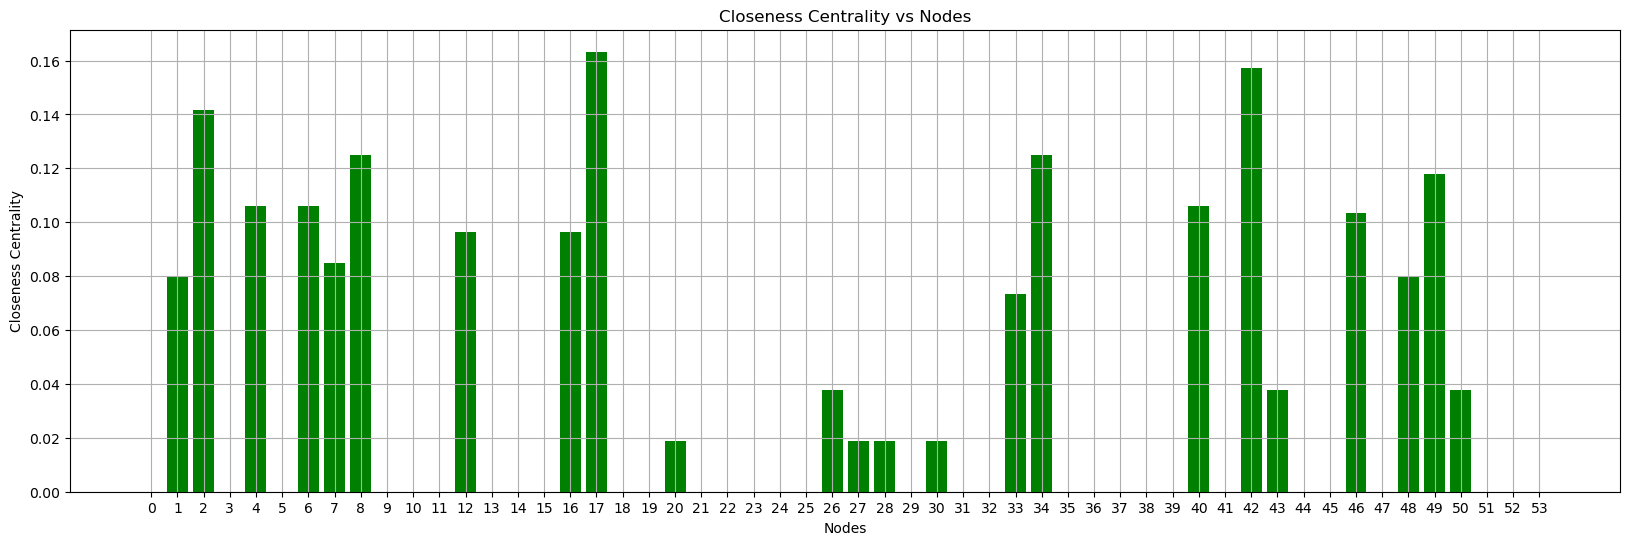

In [77]:
# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(closeness_centrality.keys(), closeness_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Closeness Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('closeness_0.5.png')
plt.show()

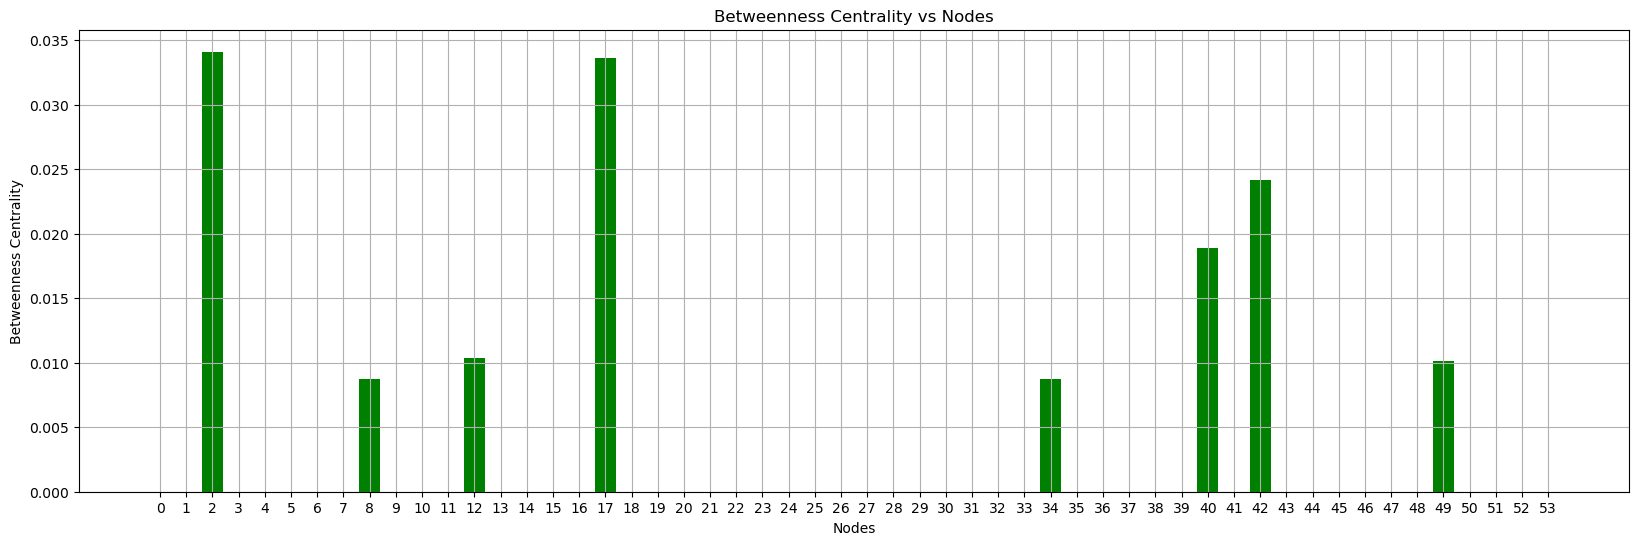

In [78]:
# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Betweenness Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('betweeness_0.3.png')
plt.show()

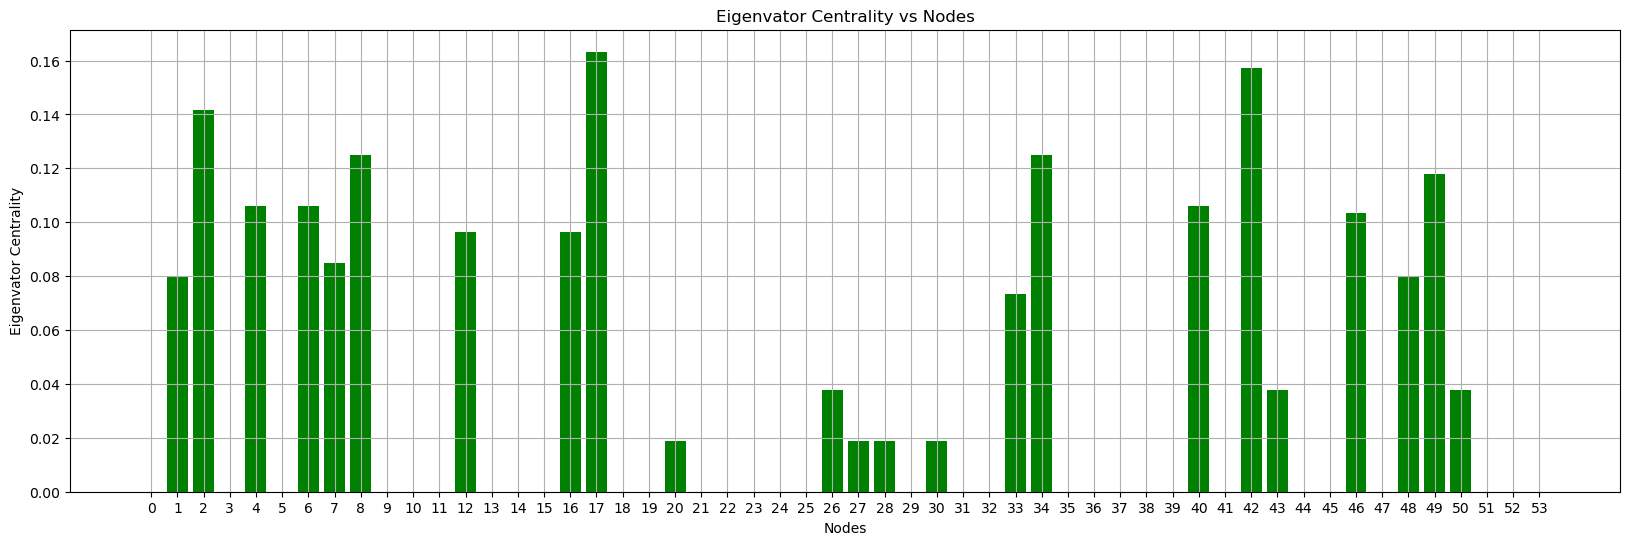

In [79]:
# Plotting
plt.figure(figsize=(20, 6))
# plt.hist(centrality_scores, bins=55, edgecolor='black')
plt.bar(eigenvector_centrality.keys(), closeness_centrality.values(), color='g')
# plt.bar(nodes, centrality_scores, marker='o', linestyle='-')
plt.title('Eigenvator Centrality vs Nodes')
plt.xlabel('Nodes')
plt.ylabel('Eigenvator Centrality')
plt.xticks(range(len(centrality_scores)))  # Setting custom ticks from 0 to 55
plt.grid(True)
# Save the figure
plt.savefig('eigenvector_0.5.png')
plt.show()

In [80]:
degree = G.degree()
degree_list = []
Edge_density = nx.density(G) # total number of edges/ Total possible edges

for (n, d) in degree:
    degree_list.append(d)
    degree_dic = {node: G.degree[node] for node in G.nodes}

av_degree = sum(degree_list)/len(degree_list)
print("Average degree", av_degree) #average degree is total degree/total number of nodes
print("Edge density", Edge_density)

Average degree 0.9629629629629629
Edge density 0.01816911250873515


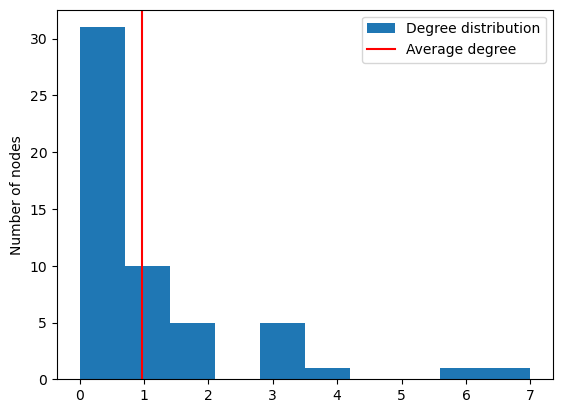

In [82]:
plt.hist(degree_list, label="Degree distribution")
plt.axvline(av_degree, color='r', label ='Average degree')
plt.legend()
plt.ylabel("Number of nodes")
plt.savefig('ns_avdegreedist_0.5.png')
plt.show()

Local Clustering Coefficient 0.12883597883597883


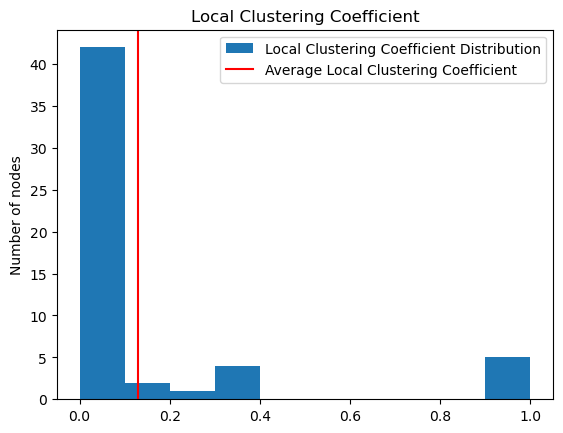

In [83]:
local_clustering_coefficient = nx.algorithms.cluster.clustering(G)
av_lcc = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)
print("Local Clustering Coefficient", av_lcc)

plt.hist(local_clustering_coefficient.values(), label="Local Clustering Coefficient Distribution")
plt.axvline(av_lcc, color='r', label="Average Local Clustering Coefficient")
plt.legend()
plt.ylabel("Number of nodes")
plt.title("Local Clustering Coefficient")
plt.savefig('ns_av_lcc_0.5.png')
plt.show()